In [1]:
'''scroll down to test your custom image'''
'''importing required libraries'''

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
from keras.models import Sequential
from keras.models import Model
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json
try:
    import cPickle as pickle
except ImportError: 
    import pickle

Using TensorFlow backend.


In [2]:
'''one can change files names here and test diffrent models'''

# Model reconstruction from JSON file
with open('models/model_architecture6.json', 'r') as f:
    NotesModel = model_from_json(f.read())

# Load weights into the new model
NotesModel.load_weights('models/model_weights6.h5')

In [3]:
'''compiling NotesModel'''

NotesModel.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [4]:
NotesModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 96, 96, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 96, 96, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 48, 48, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 64)        18496     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 48, 48, 64)        256       
__________

In [5]:
'''opens features.p and return all splits in it'''

def load_dataset():
    with open('features.p', 'rb') as fp:
        features = pickle.load(fp)
    X_train, Y_train, X_test, Y_test = features["data_train"], features["labels_train"], features["data_test"], features["labels_test"]
    return X_train, Y_train, X_test, Y_test

In [6]:
'''printing sizes of all splits and loading data'''

X_train, Y_train, X_test, Y_test = load_dataset()

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1020
number of test examples = 255
X_train shape: (1020, 96, 96, 3)
Y_train shape: (1020, 1)
X_test shape: (255, 96, 96, 3)
Y_test shape: (255, 1)


In [7]:
'''evaluating the model'''

preds = NotesModel.evaluate(x = X_test,y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

255/255 [==============================] - 6s 23ms/step

Loss = 0.07433040890769631
Test Accuracy = 0.984313725490196


In [8]:
'''predicted values for X_test with 75% as base confidence for X_test'''
'''calling confusion matrix for test data'''

y_pred = NotesModel.predict(X_test)
y_pred = (y_pred > 0.75)
cm = confusion_matrix(Y_test, y_pred)

In [9]:
cm

array([[ 74,   2],
       [  0, 179]], dtype=int64)

In [10]:
'''finding mislabeld data'''

k = []
for i in range(len(y_pred)):
    if(y_pred[i] == 1 and Y_test[i] == 0):
        k.append(i)

In [11]:
k

[70, 204]

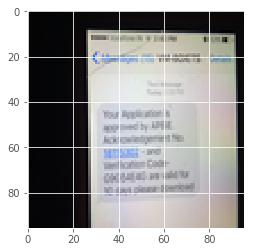

In [12]:
plt.imshow(X_test[70])

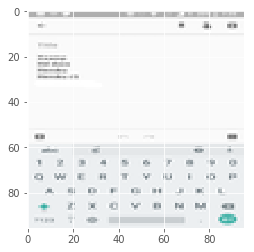

In [13]:
plt.imshow(X_test[204])

In [14]:
'''evaluating the model'''

predst = NotesModel.evaluate(x = X_train,y = Y_train)
print()
print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))

1020/1020 [==============================] - 26s 25ms/step

Loss = 0.07433040890769631
Train Accuracy = 0.984313725490196


In [15]:
'''predicted values for X_test with 75% as base confidence for X_test'''
'''calling confusion matrix for test data'''

y_predt = NotesModel.predict(X_train)
y_predt = (y_predt > 0.75)
cm = confusion_matrix(Y_train, y_predt)

In [16]:
cm

array([[269,   1],
       [  6, 744]], dtype=int64)

In [17]:
'''finding mislabeld data'''

k = []
for i in range(len(y_predt)):
    if(y_predt[i] == 1 and Y_train[i] == 0):
        k.append(i)

In [18]:
k

[203]

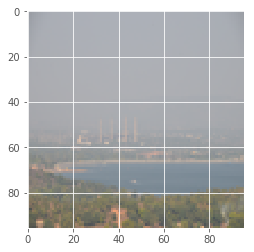

In [19]:
plt.imshow(X_train[203])

In [20]:
'''finding mislabeld data'''

k = []
for i in range(len(y_predt)):
    if(y_predt[i] == 0 and Y_train[i] == 1):
        k.append(i)

In [21]:
k

[461, 691, 729, 865, 948, 967]

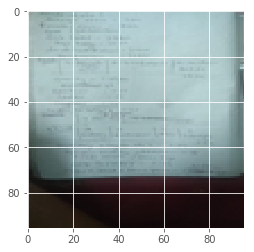

In [22]:
 plt.imshow(X_train[461])

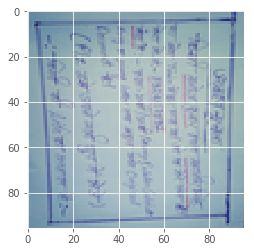

In [23]:
 plt.imshow(X_train[691])

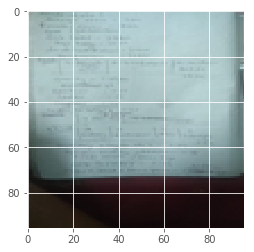

In [24]:
plt.imshow(X_train[729])

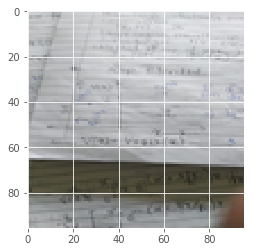

In [25]:
plt.imshow(X_train[865])

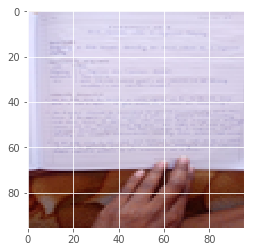

In [26]:
plt.imshow(X_train[948])

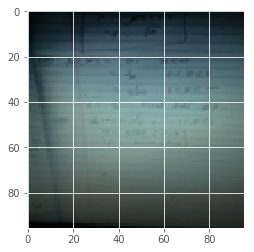

In [27]:
plt.imshow(X_train[967])

In [28]:
'''path of test image'''

path = "test-data/1.jpg"

In [29]:
'''extraction of width and height'''

width = X_train.shape[1]
height = X_train.shape[2]

In [30]:
'''resizing normalizing predicting'''

from PIL import Image
imgdata = []
img_original = Image.open(path)
img_new = img_original.resize((width, height), Image.ANTIALIAS)
img_new = np.array(img_new)
img_new = img_new/255.
imgdata.append(img_new)
imgdata = np.array(imgdata)
predt = NotesModel.predict(imgdata)
predt = (predt > 0.75)

In [31]:
'''False - if it is non-notes
   True  - if it is notes'''

predt[0][0]

False